<a href="https://colab.research.google.com/github/aakashvanmali45/Autoencoder-Implementation/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

#Define Autoencoder


In [12]:
import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    self.encoder = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 128),
        nn.ReLU(True),
        nn.Linear(128, 64),
        nn.ReLU(True),
        nn.Linear(64, 12),
        nn.ReLU(True),
        nn.Linear(12, 3),
    )

    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(True),
        nn.Linear(12, 64),
        nn.ReLU(True),
        nn.Linear(64, 128),
        nn.ReLU(True),
        nn.Linear(128, 28 * 28),
        nn.Sigmoid(),
        nn.Unflatten(1, (1, 28, 28)),
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#Dataset Loader


In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

def get_mnist_data(batch_size=128):
  transform = transforms.ToTensor()

  train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

  return DataLoader(train_data, batch_size=batch_size, shuffle=True)


#Train

In [10]:
import torch
import torch.nn as nn
from tqdm import tqdm


def train(model, dataloader, epochs, lr=1e-3, device='cpu'):

  model.to(device)
  criterion = nn.MSELoss()
  optimizer = torch.optim.Adam(model.parameters(),lr = lr)

  for epoch in range(epochs):
    total_loss = 0

    for img, _ in tqdm(dataloader):
      img = img.to(device)
      output = model(img)
      loss = criterion(output, img)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      total_loss += loss.item()
    avg_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}')



#Visualization

In [6]:
import matplotlib.pyplot as plt

def show_images(original, reconstructed, num_img= 9):

  original= original[:num_img]
  reconstructed = reconstructed[:num_img]

  fig, axes = plt.subplots(2, num_img, figsize=(num_img*2, 4))
  for i in range(num_img):
      axes[0, i].imshow(original[i][0].detach().cpu(), cmap='gray')
      axes[1, i].imshow(reconstructed[i][0].detach().cpu(), cmap='gray')
      axes[0, i].axis('off')
      axes[1, i].axis('off')

  plt.suptitle('Top: Original, Bottom: Reconstructed')
  plt.tight_layout()
  plt.show()



#Main.py


100%|██████████| 469/469 [00:11<00:00, 39.90it/s]


Epoch 1/10, Loss: 0.0684


100%|██████████| 469/469 [00:11<00:00, 39.35it/s]


Epoch 2/10, Loss: 0.0484


100%|██████████| 469/469 [00:12<00:00, 36.27it/s]


Epoch 3/10, Loss: 0.0433


100%|██████████| 469/469 [00:14<00:00, 32.95it/s]


Epoch 4/10, Loss: 0.0408


100%|██████████| 469/469 [00:13<00:00, 33.98it/s]


Epoch 5/10, Loss: 0.0392


100%|██████████| 469/469 [00:14<00:00, 33.47it/s]


Epoch 6/10, Loss: 0.0380


100%|██████████| 469/469 [00:14<00:00, 33.26it/s]


Epoch 7/10, Loss: 0.0371


100%|██████████| 469/469 [00:14<00:00, 32.96it/s]


Epoch 8/10, Loss: 0.0364


100%|██████████| 469/469 [00:13<00:00, 33.52it/s]


Epoch 9/10, Loss: 0.0359


100%|██████████| 469/469 [00:14<00:00, 31.65it/s]


Epoch 10/10, Loss: 0.0353


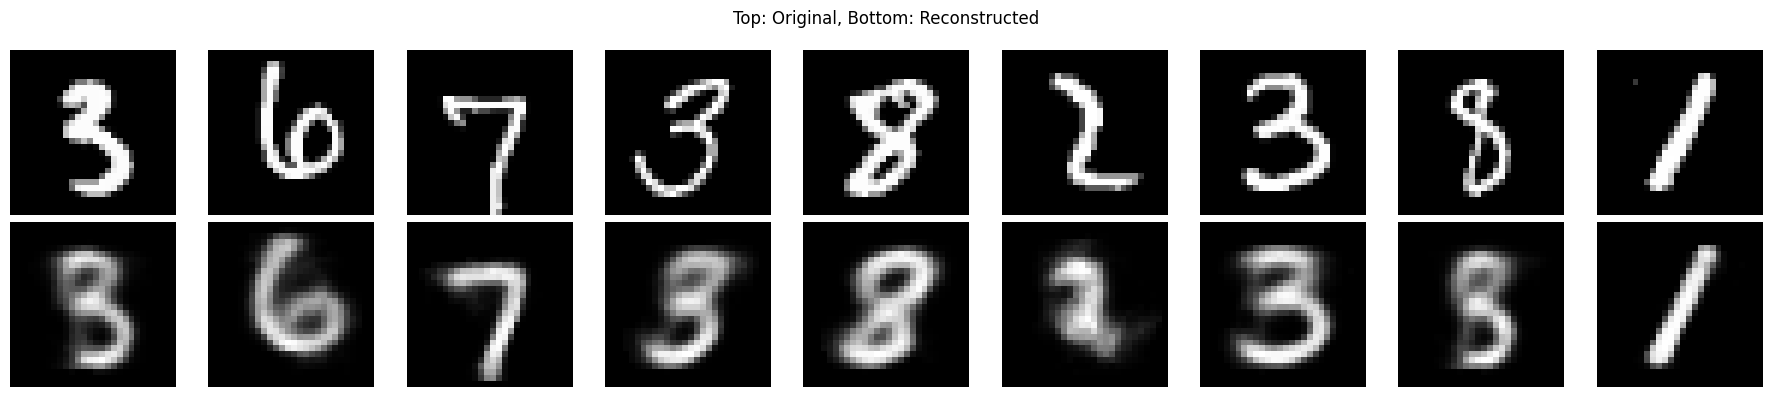

In [13]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dataloader = get_mnist_data()
model = Autoencoder()
train(model, dataloader, epochs=10, lr=1e-3, device=device)

data_iter = iter(dataloader)
images, _ = next(data_iter)
reconstructed_images = model(images.to(device))

show_images(images, reconstructed_images)